In [2]:
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt

path = os.getcwd()

matlab_exe_path = '''matlab'''

julia_path = '''C:\\Users\\mwaugh\\AppData\\Local\\Programs\\Julia\\Julia-1.4.0\\bin\\julia.exe'''

path = "src\\calibration"
#fig_path = "C:\\users\mwaugh\\github\\perla_tonetti_waugh\\Figures"

---
### [Equilibrium Technology Diffusion, Trade, and Growth](https://christophertonetti.com/files/papers/PerlaTonettiWaugh_DiffusionTradeAndGrowth.pdf) by Perla, Tonetti, and Waugh (AER 2020)
---
## 7.5. The Role of Firm Dynamics and Adoption Costs

#### Table of Contents

- [GBM](#gbm)

- [Delta Shock](#detla)

- [Connection to Welfare Decomposition (Section 7.3)](#dcomp)

The underlying MATLAB code is described (with links to the relevant ``.m`` files) in the [readme file in the calibraiton folder](/src/calibration/README.md).

---

### <a name="gbm"></a> Importance of Firm Productivity Shocks (GBM)

We uniformly scale up and down the GBM variance and mean for different values of the adoption cost parameter chi. The large value of chi is ten percent larger than the baseline calibrated value. The small value of chi is ten percent smaller than the baseline calibrated value. All other parameter values are fixed, i.e., we do not re-calibrate the model when changing these parameter values.

##### Step 1. Compute outcomes for different GBM parameter values

First, we compute a key input for the figures, saved to [``/output/robust/gbm/closest_chi_params.csv``](/output/robust/gbm/closest_chi_params.csv). Each row in this file contains the parameter values that generate a BGP equilibrium growth rate that matches the baseline aggregate growth when externally fixing a set value for chi.

In [3]:
matlab_cmd = '''"cd('src\calibration');robust_no_recalibrate_gbm;"'''

In [4]:
!{matlab_exe_path} -batch {matlab_cmd}

Calbirated values computed on date
   20-Apr-2020

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Chi Values
    0.1409

Parameters for given chi which deliver growth closest to baseline growth
  Columns 1 through 13

    'g'    'theta'    'kappa'    'chi'    'mu'    'upsilon'    'zeta'    'delta'    'N'    'gamma'    'eta'    'Theta'    'd_0'

  Column 14

    'd_T'

  Columns 1 through 13

    0.0080    4.9890    0.1042    0.1409   -0.0251    0.0390    1.0000    0.0200   10.0000    1.0000         0    1.0000    3.0225

  Columns 14 through 16

    2.8202    0.0203    3.1669

Chi Values
    0.1268

Parameters for given chi which deliver growth closest to baseline growth
  Columns 1 through 13

    'g'    'theta'    'kappa'    'chi'    'mu'    'upsilon'    'zeta'    'delta'    'N'    'gamma'    'eta'    'Theta'    'd_0'

  Column 14

    'd_T'

  Columns 1 through 13

    0.0079    4.9890    0.1042    0.1268   -0.0311    0.0483    1.0000    0.0200   10.0000

##### Step 2. Create Figure 6 in PTW 2020

The code below reads in the output from matlab and then plots the results to generate Figure 6 of PTW.

In [5]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'upsilon']

mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_1.mat")

nocaldf = pd.DataFrame(mat["record_values"])

nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["upsilon"], inplace = True)

base_chi = str(round(mat["chi_value"][0][0],3))

In [6]:
mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["upsilon"], inplace = True)

low_chi = str(round(mat["chi_value"][0][0],3))

In [7]:
mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"] 
nocaldf_higchi.sort_values(["upsilon"], inplace = True)

hig_chi = str(round(mat["chi_value"][0][0],3))

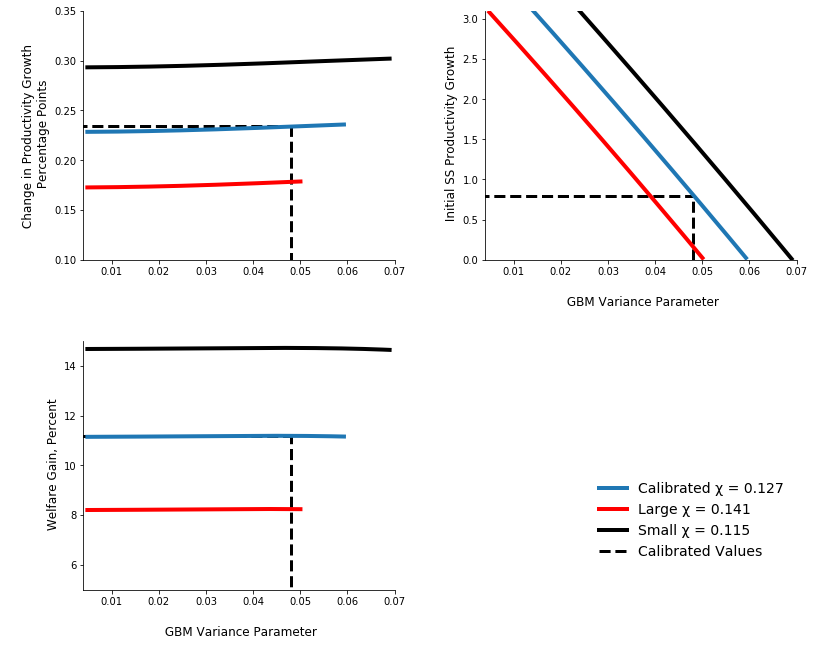

In [8]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.10,0.35)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.048, 0.00, 0.234,  
           color='k',      
           linestyle='--',
           lw = 3)    

ax[position].hlines(0.234, -0.001, 0.048 ,           
           color='k',       
           label="Calibrated Values",
           linestyle='--',
           lw = 3)    


###################################################################################

position = (0,1)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = " + base_chi)

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gold"], lw = 4, color = 'red', label = "Large χ = " + low_chi)

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gold"], lw = 4, color = 'k', label = "Small χ = " + hig_chi)

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.0,3.10)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].hlines(0.79, -0.001, 0.048,
           color='k',       
           label="Calibrated Values",
           linestyle='--',
           lw = 3)  

ax[position].vlines(0.048, 0, 0.79,   
           color='k',   
           linestyle='--',
           lw = 3)  

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

#########################################################################################

position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.upsilon, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(5,15)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.048, 0, 11.18, 
           color='k',  
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.048 , 
           color='k',       
           label="Calibrated Values", 
           linestyle='--',
           lw = 3)  

#############################################################################################
position = (1,1)

ax[position].axis('off')

#plt.savefig(fig_path + "\\gbm_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

##### Discussion of these results from PTW text
The first thing to observe from Figure 6 is that the percentage point change in productivity is nearly constant across different values of the variance parameter. In other words, the variance does not much affect the response of growth to a change in trade costs.

The parameter which does influence the change in growth is the adoption cost parameter. The three
different lines on the left panel in Figure 6 illustrate this point. A small value of chi (top black line) corresponds to small costs of adoption. When adoption costs are small, growth is more responsive to changes in trade costs. In contrast, a large value of chi (bottom red line) corresponds to large adoption costs and a smaller response of growth to trade costs. The closed form equations available in the non-GBM version of the model deliver some insight. Equation 35 shows that the change in the growth rate for a given change in trade costs is larger when adoption costs are smaller.

Even though the elasticity of growth to trade costs is not sensitive to the value of the GBM variance parameterholding adoption costs constant, the value of the GBM variance parameter—and, thus, the firm dynamics data—strongly influences the calibrated value of the adoption cost. The right panel in Figure 6 illustrates this point by tracing out how the growth rate in the initial steady state varies with the GBM variance parameter. For a given value, there is a near linear decrease in the steady state growth rate as the variance increases. Across chi values, the slope is essentially the same, but the intercept shifts, with smaller chi values leading to higher growth rates. This is intuitive—lower adoption costs lead to more adoption and faster economic growth.

The implication of these observations is that data on firm dynamics influences the inferred adoption cost and, thus, the elasticity of growth to trade costs. For example, holding fixed our target of an aggregate growth rate of 0.79 percent, if the transition matrix of relative size (Table 3) had pushed for us to find a smaller value for the GBM variance parameter, then the right panel of Figure 6 shows this would have lead us to calibrate a larger value for chi. Combining this observation with the left panel of Figure 6, our calibration strategy would have then led to a smaller increase in the growth rate for the same decrease in trade costs.

The lower panel of Figure 6 shows that the welfare gains from trade (comparing BGPs) are nearly constant across values of the GBM variance parameter, but sensitive to the value of chi, just like the elasticity of growth to trade costs. Thus, the value of chi is crucial for determining both the change in growth and the welfare gains from trade. Even though the GBM variance parameter does not much affect the welfare gains from trade when holding all other parameters constant, different values of the GBM variance parameter (which are associated with different firm dynamics moments) affect the calibration of  chi. It is in this sense that not just firm heterogeneity, but firm dynamics, matter
for the welfare gains from trade in our model.

Our discussion above, which compares our gains from trade to those in Sampson (2016), strongly suggests this point as well. When the GBM process is shut down and the model is re-calibrated, the gains from trade are still larger than what the ACR formula would imply, but they are far more modest and in line with what Sampson finds. Recall from Section 7.3 that much of the welfare gains arise because the equilibrium has an inefficiently low growth rate and that changes in trade costs change the growth rate. Using the decomposition from Section 7.3, we find that the different values of chi associated with different
values of the GBM variance parameteraffect the welfare gains from trade almost completely because of a change in the sensitivity
of growth to the trade cost and not because of different levels of inefficiency.

This point is illustrated in the Connection to the Welfare Decomposition section below.

---

### <a name="delta"></a> Importance of the Exit Shock

We uniformly scale up and down the exit shock for different values of the adoption cost parameter chi. The large value of chi is ten percent larger than the baseline calibrated value. The small value of chi is ten percent smaller than the baseline calibrated value. All other parameter values are fixed, i.e., we do not re-calibrate the model when changing these parameter values. 

##### Step 1. Compute outcomes for different Delta parameter values

This calls the matlab code to perform this operation. The code appendix below describes each of the different components. The line below executes matlab from the command line/terminal

In [10]:
matlab_cmd = '''"cd('src\calibration');robust_no_recalibrate_delta;"'''

In [11]:
!{matlab_exe_path} -batch {matlab_cmd}

Calbirated values computed on date
   20-Apr-2020

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Chi Values
    0.1409

Chi Values
    0.1268

Chi Values
    0.1153



##### Step 2. Create Figure 7 in PTW 2020

The code below reads in the output from matlab and then plots the results to create Figure 7 of PTW.

In [12]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'delta']

mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_1.mat")

nocaldf = pd.DataFrame(mat["record_values"])

nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["delta"], inplace = True)

base_chi = str(round(mat["chi_value"][0][0],3))

In [13]:
mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["delta"], inplace = True)

low_chi = str(round(mat["chi_value"][0][0],3))

In [14]:
mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"]

nocaldf_higchi.sort_values(["delta"], inplace = True)

hig_chi = str(round(mat["chi_value"][0][0],3))

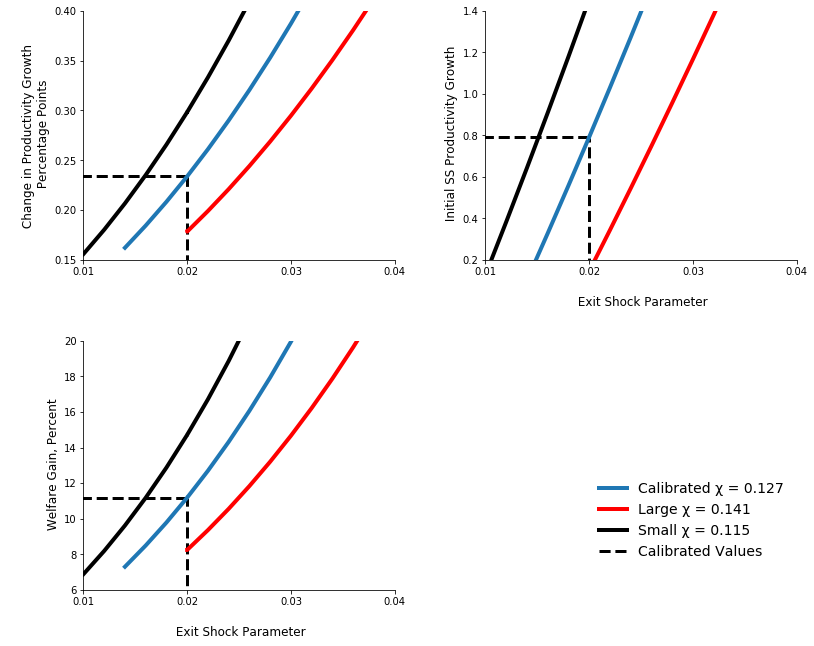

In [15]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.delta, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.15,0.4)
#ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.020, 0.00, 0.234,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.234, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line


##########################################################################################

position = (0,1)

ax[position].plot(nocaldf.delta, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = " + base_chi)

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gold"], 
                  lw = 4, color = 'red', label = "Large χ = " + low_chi)

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gold"], 
                  lw = 4, color = 'k', label = "Small χ = " + hig_chi)

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.20,1.4)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].vlines(0.02, 0.00, 0.79,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.79, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

#########################################################################################
position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.delta, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(6,20)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.02, 0, 11.18,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.02 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

###############################################################################################
position = (1,1)

ax[position].axis('off')

#plt.savefig(fig_path + "\\delta_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

##### Discussion of Figure from paper

Similarly to the GBM variance case, the delta parameter interacts with the adoption cost parameter to affect the calibrated value of chi. The right panel in Figure 6 illustrates this point by tracing out how the growth rate in the initial steady state varies with delta. For a given chi value, the steady state growth rate increases with delta; across chi values, smaller chi values (lower adoption costs) lead to higher growth rates. Figure 6 shows that larger delta values (i.e., more entry observed in the data) would induce the calibration to infer larger chi values. But because these two parameters have opposite effects on economic growth, the change
in parameter values generates offsetting effects and leaves the model’s elasticity of growth to trade costs unchanged

The welfare gains from trade display a similar pattern. The bottom panel of Figure 7 shows that the welfare gains from trade increase with the value of delta, holding all else fixed. Again, however, larger values of delta generate larger calibrated values of chi, which offset to keep the welfare gains from trade largely unchanged. Re-calibrating the model holding fixed different values for delta verifies this observation—welfare only increases slightly as delta increases.

### <a name="dcomp"></a> Connection to the Welfare Decomposition

This calls Julia to perform the same welfare decomposition exercise as that done in ``section_7-3.ipynb``.

In [16]:
!jupyter nbconvert --to script ChiUpsilonDelta.ipynb

[NbConvertApp] Converting notebook ChiUpsilonDelta.ipynb to script
[NbConvertApp] Writing 2986 bytes to ChiUpsilonDelta.jl


In [17]:
julia_command = '''ChiUpsilonDelta.jl'''

In [18]:
!{julia_path} {julia_command}

-------------------------------------------------------------------------

Baseline
Growth in Baseline: 0.79
Baseline Inefficincy term (CE units, percent of increase): 44.696
Baseline Semi-Elasticity of Growth: -2.828
-------------------------------------------------------------------------

Large Chi case
Growth in Large Chi case: 0.8
Large Chi Inefficincy term (CE units, percent of increase): 44.125
Large Chi Semi-Elasticity of Growth: -2.136
-------------------------------------------------------------------------

Small Chi case
Growth in Small Chi case: 0.79
Small Chi Inefficincy term (CE units, percent of increase): 45.145
Small Chi Semi-Elasticity of Growth: -3.63


The decomposition from Section 7.3, shows how different values of $\chi$s affect the welfare gains from trade. We find that the different values of $\chi$ associated with different values of $\upsilon^{2}$ affect the welfare gains from trade almost completely because of a change in the sensitivity of growth to the trade cost $\left(\frac{\mathrm{d} f_{g}}{\mathrm{d} d}\right)$ (i.e., the semi-elasticity of growth changes substantially) and not because of different levels of inefficiency $\left(U_1 \frac{ \partial f_{c}}{ \partial g} + U_2\right)$ (which are relativly simmilar across different specifications).